In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [2]:
picture_size = 48
data_path= 'C:/Users/susdh/Desktop/Projects ms/DeepLearning_workspace/Deep-learning-lab/Image-Project/image_data'
data_path

'C:/Users/susdh/Desktop/Projects ms/DeepLearning_workspace/Deep-learning-lab/Image-Project/image_data'

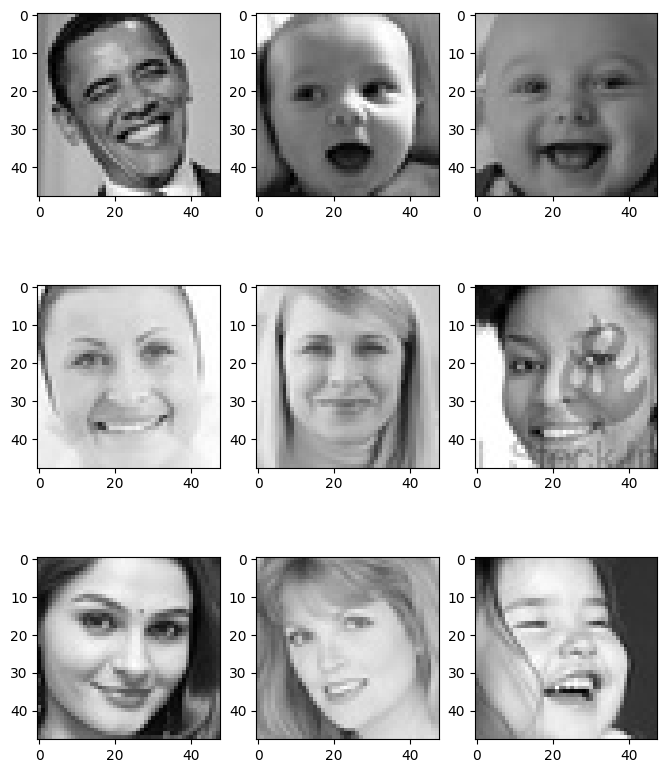

In [3]:
expression ='happy'

plt.figure(figsize=(8, 10))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    image_path = os.path.join(data_path, 'images/train', expression, os.listdir(os.path.join(data_path, 'images/train', expression))[i])
    image = load_img(image_path, target_size=(picture_size, picture_size))
    plt.imshow(image)

plt.show()


In [6]:
#making training and validation 
from keras.preprocessing.image import ImageDataGenerator
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(data_path+'/images/train',target_size=(picture_size,picture_size),
                                              batch_size=batch_size,color_mode="grayscale",class_mode='categorical',shuffle=True)

test_set = datagen_validation.flow_from_directory(data_path+'/images/validation',target_size=(picture_size,picture_size),batch_size=batch_size,
                                                  color_mode="grayscale",class_mode='categorical',shuffle=True)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [7]:
#now model building
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

no_of_classes = 7

model = Sequential()
#create 1st layer
model.add(Conv2D(64,(3,3),padding='same',input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#create 2nd layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#create 3rd layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

#create 4th layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

#create 1st fully connected layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))

#create 2nd fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(no_of_classes,activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [8]:
#fitting the model with training and validation dataset

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam, SGD, RMSprop

checkpoint = ModelCheckpoint('./model.h5',monitor='val_accuracy',save_best_only=True,mode='max',verbose=1)

earlystop = EarlyStopping(monitor='val_loss',min_delta=0,patience=7,verbose=1,restore_best_weights=True)

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=7,verbose=1,min_delta=0.0001)

callbacks_list = [earlystop,checkpoint,reduce_learningrate]

epochs = 25

model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [9]:
epochs = 25  # Adjust as needed

# Define callback functions
model_checkpoint = ModelCheckpoint("model.h5", save_best_only=True, monitor="val_loss", mode="min", verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

# Compile  model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=epochs,
    validation_data=test_set,
    validation_steps=len(test_set),
    callbacks=[model_checkpoint, early_stopping])

Epoch 1/25
226/226 [==============================] - ETA: 0s - loss: 1.7700 - accuracy: 0.3206
Epoch 1: val_loss improved from inf to 1.73680, saving model to model.h5


c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


226/226 [==============================] - 1786s 8s/step - loss: 1.7700 - accuracy: 0.3206 - val_loss: 1.7368 - val_accuracy: 0.3450
Epoch 2/25
226/226 [==============================] - ETA: 0s - loss: 1.4292 - accuracy: 0.4549
Epoch 2: val_loss improved from 1.73680 to 1.61095, saving model to model.h5
226/226 [==============================] - 1378s 6s/step - loss: 1.4292 - accuracy: 0.4549 - val_loss: 1.6109 - val_accuracy: 0.4474
Epoch 3/25
226/226 [==============================] - ETA: 0s - loss: 1.2910 - accuracy: 0.5035
Epoch 3: val_loss improved from 1.61095 to 1.27855, saving model to model.h5
226/226 [==============================] - 1286s 6s/step - loss: 1.2910 - accuracy: 0.5035 - val_loss: 1.2786 - val_accuracy: 0.5137
Epoch 4/25
226/226 [==============================] - ETA: 0s - loss: 1.2003 - accuracy: 0.5448
Epoch 4: val_loss improved from 1.27855 to 1.27335, saving model to model.h5
226/226 [==============================] - 1299s 6s/step - loss: 1.2003 - accuracy

In [15]:
#save the model
model.save('model.h5')

c:\Users\E7440\.conda\envs\tensorflow_test\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


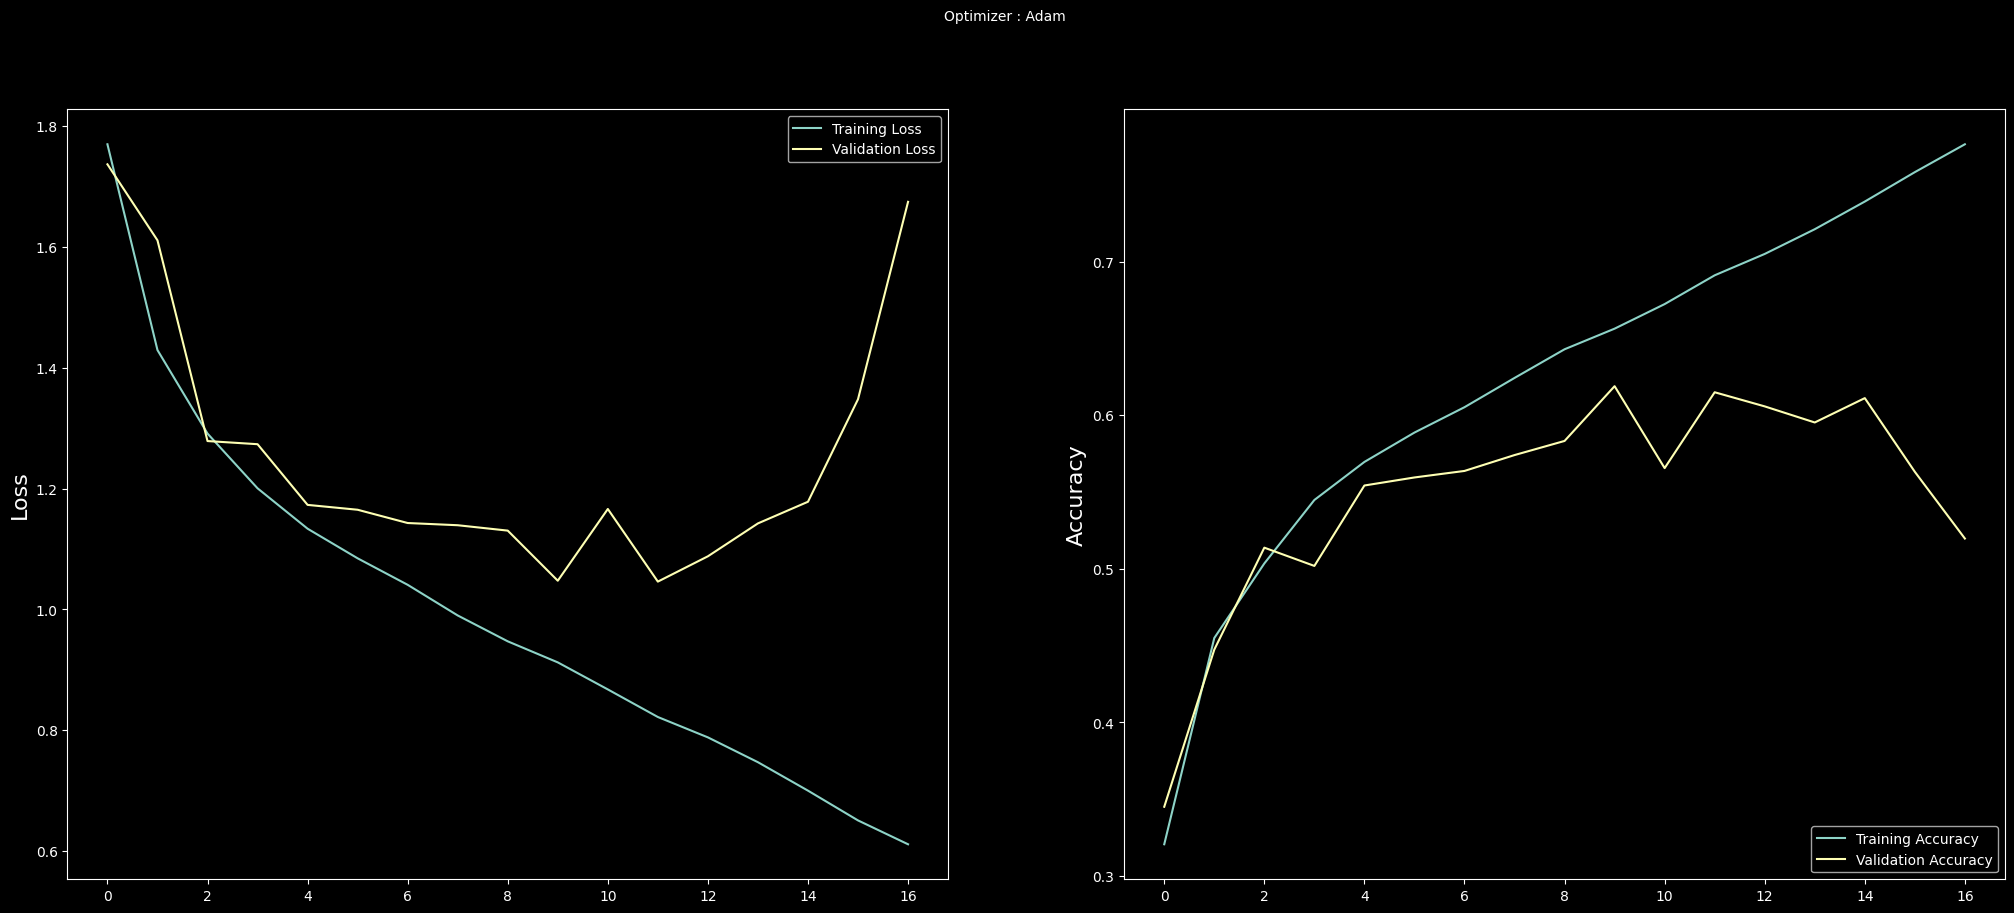

In [16]:
plt.style.use('dark_background')

plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()